In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [ ]:
df = pd.read_excel("/content/NewDatasetwithwords.xlsx")
melonfly,ctnworm, mangofly = df.loc[df['Insect'] == 'Melon Fly'], df.loc[df['Insect'] == 'Cotton bollworm'], df.loc[df['Insect'] == 'Mango Fruit Fly']




In [ ]:

melonfly['Date'].min()
melonfly['Date'].max()

ctnworm['Date'].min()
ctnworm['Date'].max()

mangofly['Date'].min()
mangofly['Date'].max()  

Timestamp('2021-01-01 00:00:00')

In [ ]:
cols = ['Season',	'Humidity'  ,'Location','Crop Habitat',	'Wind',	'Rain',	'Sunlight',	'Egg Hatch','Infestation']
melonfly.drop(cols, axis=1, inplace=True)
melonfly = melonfly.sort_values('Date')
melonfly.isnull().sum()

Insect               0
Date                 0
Crop                 0
Temperature          0
Number of Insects    0
dtype: int64

In [ ]:
ctnworm.drop(cols, axis=1, inplace=True)
ctnworm = ctnworm.sort_values('Date')
ctnworm.isnull().sum()

Insect               0
Date                 0
Crop                 0
Temperature          0
Number of Insects    0
dtype: int64

In [ ]:
mangofly.drop(cols, axis=1, inplace=True)
mangofly = mangofly.sort_values('Date')
mangofly.isnull().sum()

Insect               0
Date                 0
Crop                 0
Temperature          0
Number of Insects    0
dtype: int64

In [ ]:
melonfly = melonfly.groupby('Date')['Number of Insects'].sum().reset_index()
mangofly = mangofly.groupby('Date')['Number of Insects'].sum().reset_index()
ctnworm = ctnworm.groupby('Date')['Number of Insects'].sum().reset_index()
melonfly

,Date,Number of Insects
0,2020-06-17,4
1,2020-06-18,3
2,2020-06-19,5
3,2020-06-20,18
4,2020-06-21,20
...,...,...
194,2020-12-28,15
195,2020-12-29,27
196,2020-12-30,7
197,2020-12-31,9


In [ ]:
ctnworm = ctnworm.set_index('Date')
mangofly = mangofly.set_index('Date')
melonfly = melonfly.set_index('Date')
melonfly.index

DatetimeIndex(['2020-06-17', '2020-06-18', '2020-06-19', '2020-06-20',
               '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
               '2020-06-25', '2020-06-26',
               ...
               '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-26',
               '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31', '2021-01-01'],
              dtype='datetime64[ns]', name='Date', length=199, freq=None)

In [ ]:
y1 = melonfly['Number of Insects'].resample('D').mean()
y2 = mangofly['Number of Insects'].resample('D').mean()
y3 = ctnworm['Number of Insects'].resample('D').mean()

In [ ]:
y1['2020':]
y2['2020':]
y3['2020':]

Date
2020-06-17     4
2020-06-18     3
2020-06-19     5
2020-06-20    18
2020-06-21    20
              ..
2020-12-28    15
2020-12-29    27
2020-12-30     7
2020-12-31     9
2021-01-01    12
Freq: D, Name: Number of Insects, Length: 199, dtype: int64

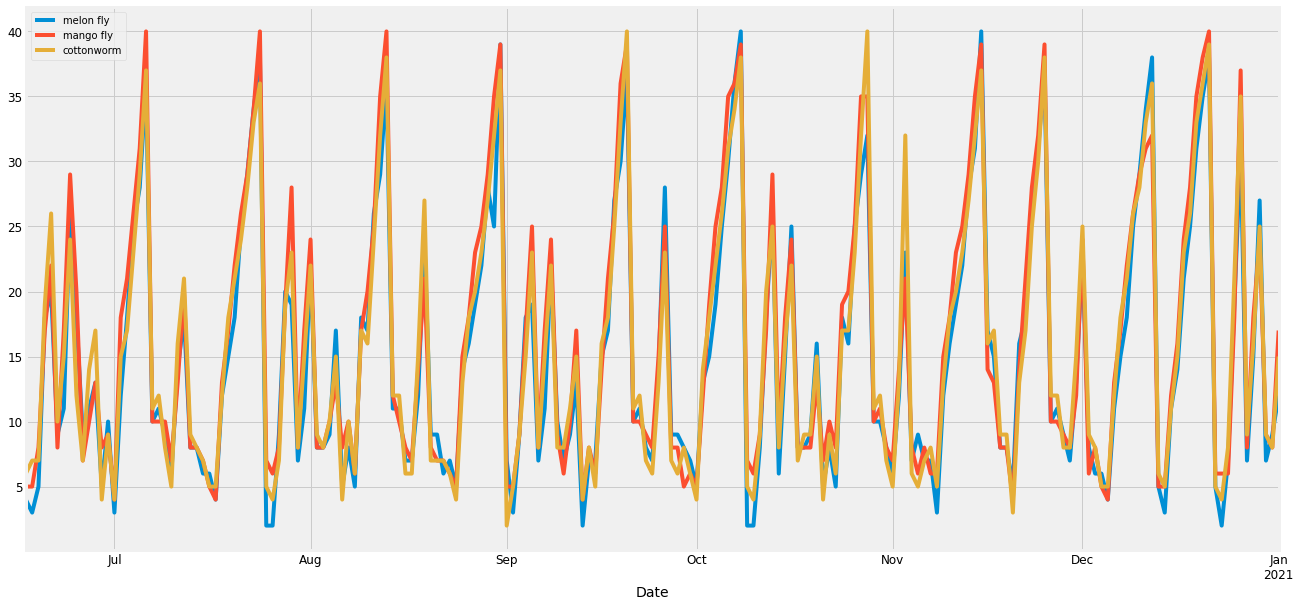

In [ ]:
y1.plot(label = "melon fly",figsize=(20, 10))
y2.plot(label = "mango fly",figsize=(20,10))
y3.plot(label = "cottonworm",figsize=(20,10))
plt.legend(loc="upper left")
plt.show()

In [ ]:
m1 = melonfly['Number of Insects'].resample('MS').mean()
m2 = mangofly['Number of Insects'].resample('MS').mean()
m3 = ctnworm['Number of Insects'].resample('MS').mean()

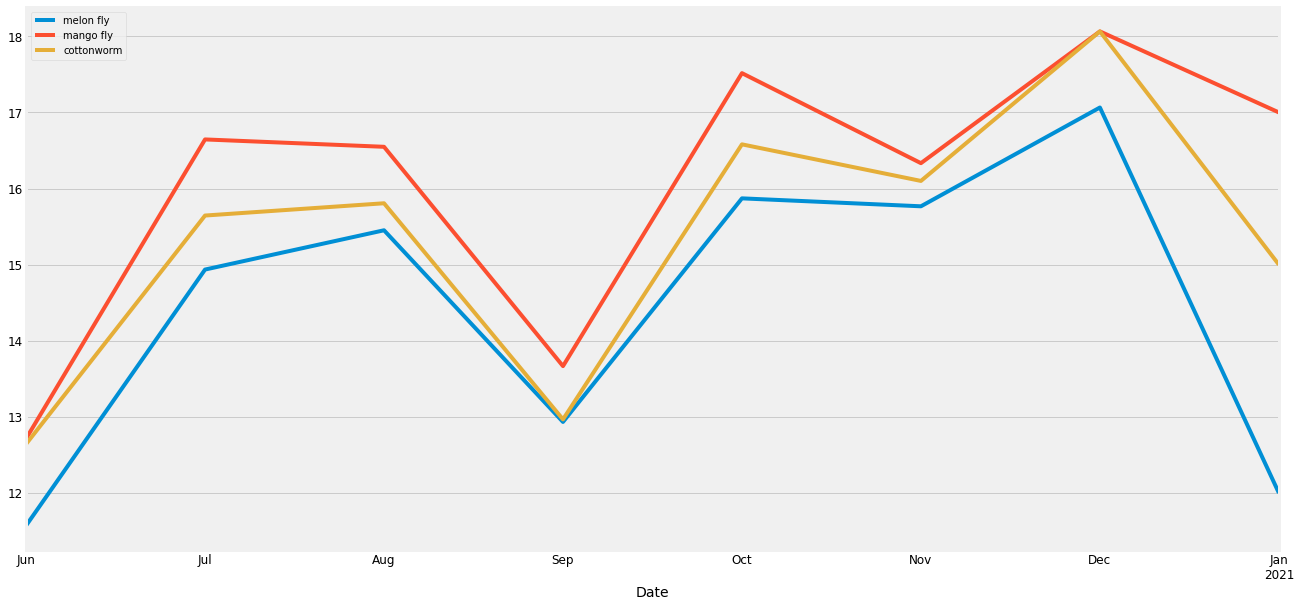

In [ ]:
m1.plot(label = "melon fly",figsize=(20, 10))
m2.plot(label = "mango fly",figsize=(20,10))
m3.plot(label = "cottonworm",figsize=(20,10))
plt.legend(loc="upper left")
plt.show()

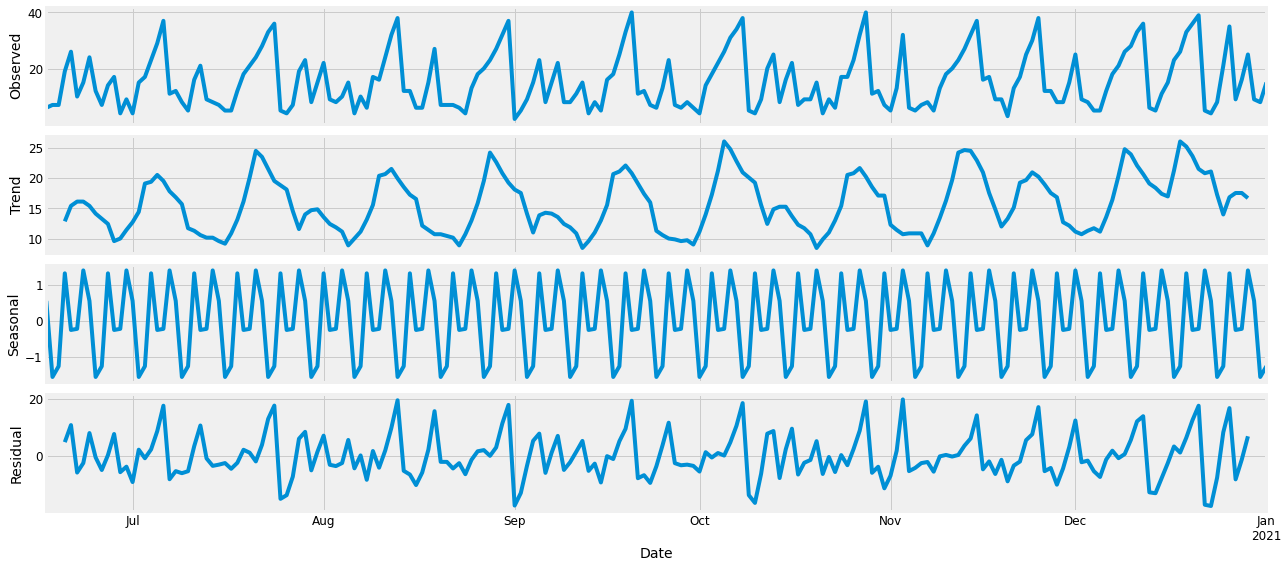

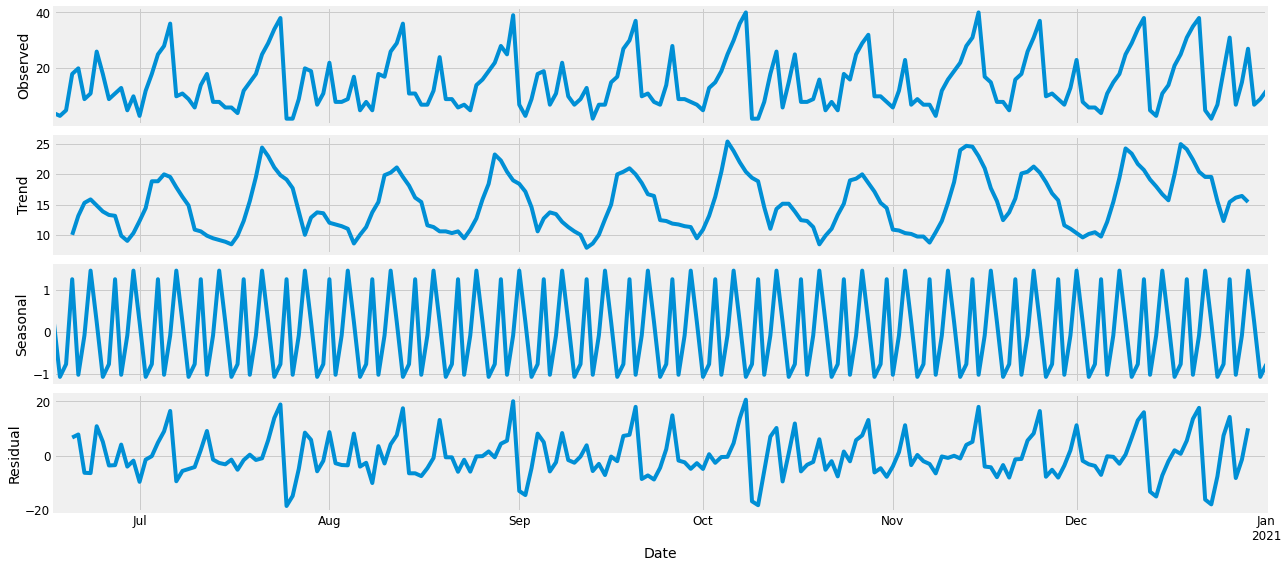

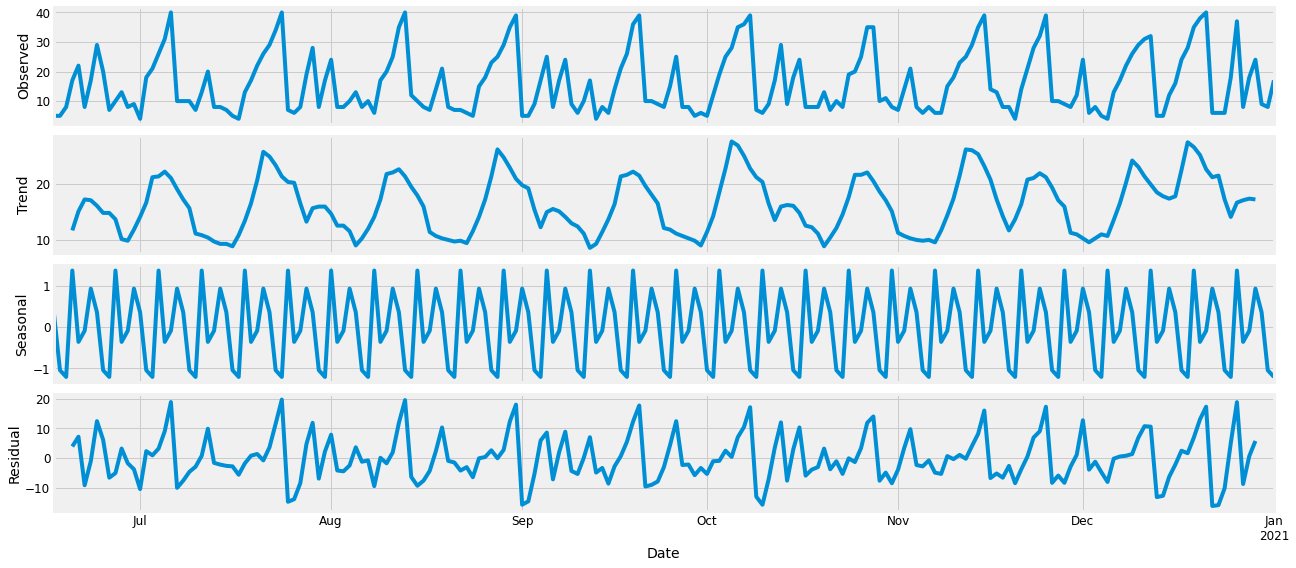

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition1 = sm.tsa.seasonal_decompose(ctnworm,model='additive')
decomposition2 = sm.tsa.seasonal_decompose(melonfly,model='additive')
decomposition3 = sm.tsa.seasonal_decompose(mangofly,model='additive')

fig1 = decomposition1.plot()
fig2 = decomposition2.plot()
fig3 = decomposition3.plot()

 
plt.show()